Question 1: What is Simple Linear Regression?



Simple Linear Regression models the relationship between one independent variable
𝑋
X and one dependent variable
𝑌
Y by fitting a straight line:

𝑌
=
𝛽
0
+
𝛽
1
𝑋
+
𝜀
Y=β
0
	​

+β
1
	​

X+ε

where
𝛽
0
β
0
	​

 is the intercept,
𝛽
1
β
1
	​

 is the slope (change in
𝑌
Y per unit change in
𝑋
X), and
𝜀
ε is the error term. The model is typically fit by minimizing the sum of squared residuals (Ordinary Least Squares — OLS).

Question 2: What are the key assumptions of Simple Linear Regression?

Key OLS assumptions (classical linear regression assumptions):

Linearity — The relationship between
𝑋
X and the expected value of
𝑌
Y is linear.

Independence — Observations (and errors) are independent.

Homoscedasticity — Errors have constant variance across values of
𝑋
X. (No heteroscedasticity.)

Normality of errors — Errors
𝜀
ε are normally distributed (mainly for inference: t-tests, CIs).

No perfect multicollinearity — (For multiple regression) predictors are not perfect linear combinations of each other.

Exogeneity — Predictor(s) are uncorrelated with the error term (no omitted variable bias / no endogeneity).

If these are violated, estimates may be biased, inefficient, or inference (p-values, CIs) may be invalid.

Question 3: What is heteroscedasticity, and why is it important to address in regression models?

Heteroscedasticity means the variance of the regression errors is not constant across levels of the predictor(s). In other words, the spread of residuals changes with
𝑋
X or predicted
𝑌
Y.

Why address it:

OLS coefficient estimates remain unbiased but are no longer BLUE (not the Best Linear Unbiased Estimator) — they are inefficient.

Standard errors become incorrect, causing unreliable hypothesis tests and confidence intervals (false positives/negatives).

Remedies: transform the dependent variable (e.g., log), use weighted least squares (WLS), or use robust (heteroscedasticity-consistent) standard errors (e.g., HC0/HC3), or model variance explicitly.

Question 4: What is Multiple Linear Regression?

Multiple Linear Regression extends simple linear regression to multiple predictors. The model:

𝑌
=
𝛽
0
+
𝛽
1
𝑋
1
+
𝛽
2
𝑋
2
+
⋯
+
𝛽
𝑝
𝑋
𝑝
+
𝜀
Y=β
0
	​

+β
1
	​

X
1
	​

+β
2
	​

X
2
	​

+⋯+β
p
	​

X
p
	​

+ε

It estimates the conditional relationship between the dependent variable and each predictor while holding other predictors constant. Same assumptions as simple regression apply (with extra concern for multicollinearity).

Question 5: What is polynomial regression, and how does it differ from linear regression?

Polynomial regression is a special case of linear regression where predictors are powers (polynomial terms) of an original variable. For example, a 2nd-degree polynomial model:

𝑌
=
𝛽
0
+
𝛽
1
𝑋
+
𝛽
2
𝑋
2
+
𝜀
Y=β
0
	​

+β
1
	​

X+β
2
	​

X
2
+ε

It is linear in the parameters (coefficients) even though the relationship between
𝑋
X and
𝑌
Y can be non-linear. This differs from simple linear regression because simple linear regression fits only a straight line; polynomial regression fits curves by adding higher-order terms.

Question 6: Implement a Python program to fit a Simple Linear Regression model to the sample data and plot the regression line.

Intercept: 0.1800, Slope: 1.9800


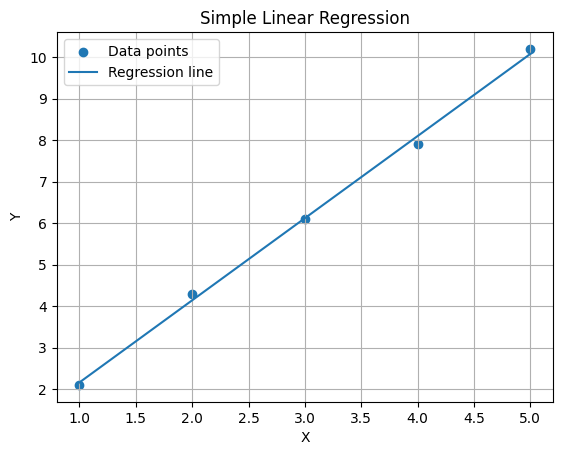

In [1]:
# Question 6: Simple Linear Regression example
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Fit model
model = LinearRegression()
model.fit(X, Y)

# Coefficients
intercept = model.intercept_
slope = model.coef_[0]
print(f"Intercept: {intercept:.4f}, Slope: {slope:.4f}")

# Predictions for plotting
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
Y_plot = model.predict(X_plot)

# Plot
plt.scatter(X, Y, label='Data points')
plt.plot(X_plot, Y_plot, label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


Question 7: Fit a Multiple Linear Regression model and check VIF for multicollinearity.


In [2]:
# Question 7: Multiple Linear Regression + VIF
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

# Features and target
X = data[['Area', 'Rooms']]
y = data['Price']

# Fit sklearn model
lr = LinearRegression()
lr.fit(X, y)
print("Coefficients:", dict(zip(X.columns, lr.coef_)))
print("Intercept:", lr.intercept_)

# Calculate VIF
# Add constant for statsmodels
X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]
print("\nVIF values:")
print(vif_data)


Coefficients: {'Area': np.float64(63.15789473684211), 'Rooms': np.float64(34736.842105263146)}
Intercept: 103157.89473684214

VIF values:
  feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


Interpretation guidelines:

Ignore the VIF for the constant. For predictors, a common rule of thumb:

VIF ≈ 1: no multicollinearity

VIF > 5: moderate multicollinearity

VIF > 10: high multicollinearity (serious)
Given this tiny sample, VIF may be unstable — in real data use more observations.

Question 8: Implement polynomial regression (2nd-degree) and plot the resulting curve.

Coefficients: [1.94 0.2 ]
Intercept: 0.0600000000000005


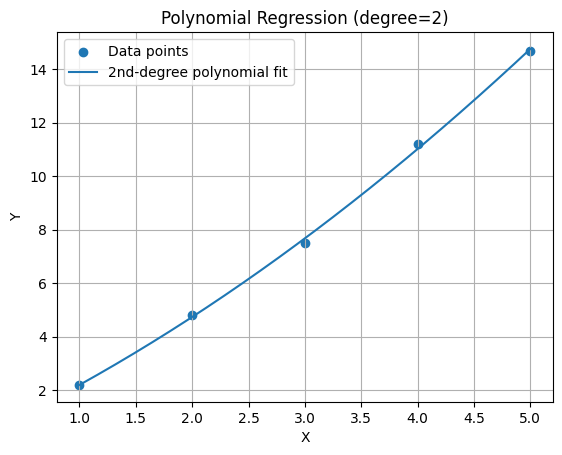

In [3]:
# Question 8: Polynomial Regression (degree 2)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)  # columns: [X, X^2]

# Fit linear regression on polynomial features
model = LinearRegression()
model.fit(X_poly, Y)

# Print coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Plot
X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
Y_plot = model.predict(X_plot_poly)

plt.scatter(X, Y, label='Data points')
plt.plot(X_plot, Y_plot, label='2nd-degree polynomial fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (degree=2)')
plt.legend()
plt.grid(True)
plt.show()


Question 9: Create a residuals plot for the given data and assess heteroscedasticity.

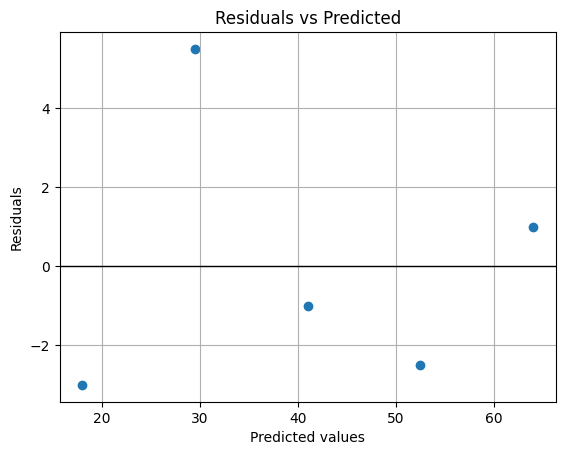

{'Lagrange multiplier statistic': np.float64(1.3654789844249975), 'p-value': np.float64(0.2425901780843885), 'f-value': np.float64(1.127091282653352), 'f p-value': np.float64(0.36628923988686196)}


In [4]:
# Question 9: Residual plot and heteroscedasticity check
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit linear model
model = LinearRegression()
model.fit(X, Y)
preds = model.predict(X)
residuals = Y - preds

# Residuals plot
plt.scatter(preds, residuals)
plt.axhline(0, color='black', linewidth=1)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.grid(True)
plt.show()

# Breusch-Pagan test for heteroscedasticity
# Need to add constant for the test regression
X_sm = sm.add_constant(X)
bp_test = het_breuschpagan(residuals, X_sm)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))


Question 10: You’re a data scientist for real estate; heteroscedasticity and multicollinearity detected. Steps to address and ensure a robust model.

Answer (step-by-step):

Understand the issues

For multicollinearity: predictors highly correlated, inflating standard errors, unstable coefficients.

For heteroscedasticity: non-constant error variance, invalid standard errors and tests.

Address multicollinearity

Examine correlations & VIFs. Identify pairs or sets of highly correlated predictors.

Remove or combine predictors. Drop redundant features (e.g., highly correlated derived features), or combine them into a single index (e.g., principal component, or average).

Use feature engineering. E.g., instead of Area and Area per room both included, choose one or create a ratio.

Regularization. Use Ridge or Lasso regression (shrinkage reduces variance of coefficients). Ridge handles multicollinearity well.

Dimensionality reduction. PCA or partial least squares (PLS) if many features.

Address heteroscedasticity

Transform the target. Commonly log(price) stabilizes variance (works well when variance grows with mean). Fit model on transformed target and interpret accordingly (use exponentiation when predicting).

Weighted Least Squares (WLS). Assign weights inversely proportional to variance (if variance structure known/estimable).

Use robust standard errors. If only inference is a concern and you don’t want to transform model form, use heteroscedasticity-consistent (HC) standard errors (e.g., HC3) to get valid p-values/CIs.

Model variance explicitly. Use models like generalized least squares (GLS) or heteroscedastic regression models.

Model selection & validation

Cross-validate models (K-fold CV) using appropriate scoring (e.g., RMSE on original or transformed scale).

Compare models: OLS, Ridge/Lasso, models on log-target, WLS. Choose based on predictive performance and interpretability.

Check residuals again after changes (plots, BP test) to confirm improvements.

Practical steps for real estate

Log-transform price: most real estate prices are right-skewed; log(price) often stabilizes variance.

Use domain-informed features: e.g., distance to city center, neighborhood dummies (encode location), age of property, amenities. Avoid including multiple highly-overlapping location features.

Regularization & ensemble: Use Ridge or tree-based models (random forest, gradient boosting) if relationships non-linear and complex. Tree-based methods are robust to monotonic heteroscedasticity and multicollinearity (they handle correlated predictors better for prediction; coefficient interpretation differs).

Explainability: If interpretability is required, prefer simpler models with careful feature selection and regularization. Use SHAP or partial dependence for tree models.

Reporting

Report which transformations/techniques were used and why. Show residual diagnostics before and after. For business stakeholders, present results in price-prediction accuracy (RMSE, MAE), and the effect of transformations (e.g., % error on original scale).

Notes & Practical Tips

For small datasets, statistics like VIF and formal tests can be unstable; collect more data if possible.

When you transform the target (e.g., log), remember to back-transform predictions carefully (use bias correction if needed).

For production systems, validate on a hold-out and monitor model performance over time (concept drift, changing price distributions.